**The effect of power and transmission on the prices of top 3 brands?**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statistics import *

In [ ]:
# Reading the data
data = pd.read_csv('/content/Car_sale_ads.csv')

In [ ]:
# Creating a subset dataframe that is needed for the research question
newData= data[['Transmission','Power_HP','Price','Vehicle_model','Vehicle_brand','Currency']]
newData

,Transmission,Power_HP,Price,Vehicle_model,Vehicle_brand,Currency
0,Manual,145.0,86200,595,Abarth,PLN
1,Manual,75.0,43500,Other,Abarth,PLN
2,Automatic,180.0,44900,500,Abarth,PLN
3,Manual,160.0,39900,500,Abarth,PLN
4,Manual,165.0,97900,595,Abarth,PLN
...,...,...,...,...,...,...
208299,Manual,173.0,39900,Other,Żuk,PLN
208300,Manual,70.0,10900,Other,Żuk,PLN
208301,Manual,60.0,6900,Other,Żuk,PLN
208302,Manual,36.0,5700,Other,Żuk,PLN


In [ ]:
# Generalizing the price to be in dollars:

# Checking what type of currencies do we have in the dataset -> PLN=0.2$ EUR=1.05$
newData.Currency.unique()

#Converting the price column based on the currency 
(newData['Price'][newData['Currency'] == 'PLN'])= (newData['Price'][newData['Currency'] == 'PLN'])*0.2 
(newData['Price'][newData['Currency'] == 'EUR'])= (newData['Price'][newData['Currency'] == 'EUR'])*1.05
                                                               
newData

<ipython-input-8-7d0a9feae8cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (newData['Price'][newData['Currency'] == 'PLN'])= (newData['Price'][newData['Currency'] == 'PLN'])*0.2
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Transmission,Power_HP,Price,Vehicle_model,Vehicle_brand,Currency
0,Manual,145.0,17240.0,595,Abarth,PLN
1,Manual,75.0,8700.0,Other,Abarth,PLN
2,Automatic,180.0,8980.0,500,Abarth,PLN
3,Manual,160.0,7980.0,500,Abarth,PLN
4,Manual,165.0,19580.0,595,Abarth,PLN
...,...,...,...,...,...,...
208299,Manual,173.0,7980.0,Other,Żuk,PLN
208300,Manual,70.0,2180.0,Other,Żuk,PLN
208301,Manual,60.0,1380.0,Other,Żuk,PLN
208302,Manual,36.0,1140.0,Other,Żuk,PLN


In [ ]:
# Dropping the currency column as it is no longer needed:
newData=newData.drop(['Currency'], axis=1)
newData


,Transmission,Power_HP,Price,Vehicle_model,Vehicle_brand
0,Manual,145.0,17240.0,595,Abarth
1,Manual,75.0,8700.0,Other,Abarth
2,Automatic,180.0,8980.0,500,Abarth
3,Manual,160.0,7980.0,500,Abarth
4,Manual,165.0,19580.0,595,Abarth
...,...,...,...,...,...
208299,Manual,173.0,7980.0,Other,Żuk
208300,Manual,70.0,2180.0,Other,Żuk
208301,Manual,60.0,1380.0,Other,Żuk
208302,Manual,36.0,1140.0,Other,Żuk


In [ ]:
# Extracting the top 3 brands
top3 = newData['Vehicle_brand'].value_counts()[:3]
top3

Volkswagen    18455
BMW           16983
Audi          16730
Name: Vehicle_brand, dtype: int64

In [ ]:
# Droping all the rows in which the brand is not amongst the top3:
x=newData.loc[(newData['Vehicle_brand'] != 'Volkswagen')&(newData['Vehicle_brand'] != 'Audi')&(newData['Vehicle_brand'] != 'BMW')].index
x
newData.drop(x , inplace = True )
newData 

,Transmission,Power_HP,Price,Vehicle_model,Vehicle_brand
1550,Manual,101.0,1180.0,100,Audi
1551,Manual,174.0,1380.0,100,Audi
1552,Manual,150.0,1000.0,100,Audi
1553,Manual,115.0,3980.0,100,Audi
1554,Manual,137.0,2999.8,100,Audi
...,...,...,...,...,...
202270,Manual,90.0,560.0,Vento,Volkswagen
202271,Manual,90.0,860.0,Vento,Volkswagen
202272,Manual,90.0,580.0,Vento,Volkswagen
202273,Manual,90.0,920.0,Vento,Volkswagen


In [ ]:
#Missing values in the data
nullData=newData.isnull().sum()
nullData

Transmission     141
Power_HP         184
Price              0
Vehicle_model      0
Vehicle_brand      0
dtype: int64

In [ ]:
# Percentage of missing data: ---> 0% of data are null values
data_count = np.product(newData.shape)
(nullData.sum()/data_count)*100

0.12459745437816286

In [ ]:
# Percentage of missing data in each column to make sure that all the data exist 
newData.isnull().sum() / newData.shape[0] * 100

Transmission     0.270281
Power_HP         0.352707
Price            0.000000
Vehicle_model    0.000000
Vehicle_brand    0.000000
dtype: float64

In [ ]:
# Dropping missing values in Transmission and Power_HP as they are approximate 0%
# Since the percentage error is approximate 0% we will drop all rows which have missing values
newData= newData.dropna(axis=0)
# Ensuring that there are no missing values
newData.isnull().sum() / newData.shape[0] * 100

Transmission     0.0
Power_HP         0.0
Price            0.0
Vehicle_model    0.0
Vehicle_brand    0.0
dtype: float64

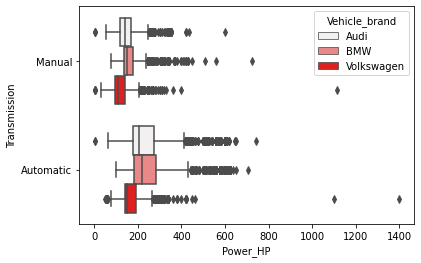

In [ ]:
# Checking the outliers --> we can conclude that there are some outliers in the Transmission and Power_HP column
sns.boxplot(data=newData, x="Power_HP", y="Transmission", hue="Vehicle_brand",color="red")

In [ ]:
#Dealing with outliers in Manual cars:
manual_cars= newData.copy()
i=manual_cars.loc[(manual_cars['Transmission'] != 'Manual')].index
manual_cars
manual_cars.drop(i, inplace = True)
manual_cars
x=manual_cars['Power_HP']
w= x.describe()
print(w) 

count    25026.000000
mean       132.218293
std         41.447437
min          1.000000
25%        105.000000
50%        130.000000
75%        150.000000
max       1115.000000
Name: Power_HP, dtype: float64


In [ ]:
# After knowing that q1=105 , q2=130 , q3=150 we are going to detect the upper and lower bound:
q1=105
q2=130
q3=150
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print( ub, lb,iqr)

217.5 37.5 45


In [ ]:
manual_cars['condition']=( manual_cars['Power_HP']> 217.5) | ( manual_cars['Power_HP']<37.5)
manual_cars

,Transmission,Power_HP,Price,Vehicle_model,Vehicle_brand,condition
1550,Manual,101.0,1180.0,100,Audi,False
1551,Manual,174.0,1380.0,100,Audi,False
1552,Manual,150.0,1000.0,100,Audi,False
1553,Manual,115.0,3980.0,100,Audi,False
1554,Manual,137.0,2999.8,100,Audi,False
...,...,...,...,...,...,...
202270,Manual,90.0,560.0,Vento,Volkswagen,False
202271,Manual,90.0,860.0,Vento,Volkswagen,False
202272,Manual,90.0,580.0,Vento,Volkswagen,False
202273,Manual,90.0,920.0,Vento,Volkswagen,False


In [ ]:
#manual_cars.loc[manual_cars['condition']=='true']
m=manual_cars[manual_cars["condition"]].index
print(m)
#Droppin outliers on manual cars in the original dataframe
manual_cars.drop(m, inplace=True)


Int64Index([  1850,   1984,   2430,   3614,   3764,   3999,   4200,   4229,
              4244,   4360,
            ...
            197629, 197708, 197780, 197784, 200200, 200310, 200337, 201700,
            202048, 202049],
           dtype='int64', length=767)


In [ ]:
display(manual_cars)

,Transmission,Power_HP,Price,Vehicle_model,Vehicle_brand,condition
1550,Manual,101.0,1180.0,100,Audi,False
1551,Manual,174.0,1380.0,100,Audi,False
1552,Manual,150.0,1000.0,100,Audi,False
1553,Manual,115.0,3980.0,100,Audi,False
1554,Manual,137.0,2999.8,100,Audi,False
...,...,...,...,...,...,...
202270,Manual,90.0,560.0,Vento,Volkswagen,False
202271,Manual,90.0,860.0,Vento,Volkswagen,False
202272,Manual,90.0,580.0,Vento,Volkswagen,False
202273,Manual,90.0,920.0,Vento,Volkswagen,False


In [ ]:
#Dealing with outliers in Automatic cars:
Automatic_cars= newData.copy()
i1=Automatic_cars.loc[(Automatic_cars['Transmission'] != 'Automatic')].index
Automatic_cars
Automatic_cars.drop(i1, inplace = True)
Automatic_cars
x1=Automatic_cars['Power_HP']
w1= x1.describe()
print(w1) 

count    26927.000000
mean       223.425484
std         90.863853
min          1.000000
25%        163.000000
50%        190.000000
75%        252.000000
max       1398.000000
Name: Power_HP, dtype: float64


In [ ]:
# After knowing that q1=163 , q2=190 , q3=252 we are going to detect the upper and lower bound:
q11=163
q22=190
q33=252
iqr1=q33-q11
ub1=q33+(1.5*iqr1)
lb1=q11-(1.5*iqr1)
print( ub1, lb1,iqr1)

385.5 29.5 89


In [ ]:
Automatic_cars['condition']=( Automatic_cars['Power_HP']> 385.5) | ( Automatic_cars['Power_HP']<29.5)
Automatic_cars

,Transmission,Power_HP,Price,Vehicle_model,Vehicle_brand,condition
1564,Automatic,116.0,3700.0,100,Audi,False
1565,Automatic,115.0,3500.0,100,Audi,False
1570,Automatic,136.0,2080.0,100,Audi,False
1571,Automatic,136.0,3780.0,100,Audi,False
1584,Automatic,113.0,3990.0,80,Audi,False
...,...,...,...,...,...,...
202121,Automatic,60.0,6499.8,up!,Volkswagen,False
202130,Automatic,75.0,8680.0,up!,Volkswagen,False
202144,Automatic,83.0,19980.0,up!,Volkswagen,False
202238,Automatic,75.0,10900.0,up!,Volkswagen,False


In [ ]:
a=Automatic_cars[Automatic_cars["condition"]].index
#Droppin outliers on Automatic cars in the original dataframe
Automatic_cars.drop(a, inplace=True)
Automatic_cars

,Transmission,Power_HP,Price,Vehicle_model,Vehicle_brand,condition
1564,Automatic,116.0,3700.0,100,Audi,False
1565,Automatic,115.0,3500.0,100,Audi,False
1570,Automatic,136.0,2080.0,100,Audi,False
1571,Automatic,136.0,3780.0,100,Audi,False
1584,Automatic,113.0,3990.0,80,Audi,False
...,...,...,...,...,...,...
202121,Automatic,60.0,6499.8,up!,Volkswagen,False
202130,Automatic,75.0,8680.0,up!,Volkswagen,False
202144,Automatic,83.0,19980.0,up!,Volkswagen,False
202238,Automatic,75.0,10900.0,up!,Volkswagen,False


In [ ]:
frames = [Automatic_cars, manual_cars]
  
df = pd.concat(frames)
df.drop(['condition'], axis=1)

,Transmission,Power_HP,Price,Vehicle_model,Vehicle_brand
1564,Automatic,116.0,3700.0,100,Audi
1565,Automatic,115.0,3500.0,100,Audi
1570,Automatic,136.0,2080.0,100,Audi
1571,Automatic,136.0,3780.0,100,Audi
1584,Automatic,113.0,3990.0,80,Audi
...,...,...,...,...,...
202270,Manual,90.0,560.0,Vento,Volkswagen
202271,Manual,90.0,860.0,Vento,Volkswagen
202272,Manual,90.0,580.0,Vento,Volkswagen
202273,Manual,90.0,920.0,Vento,Volkswagen


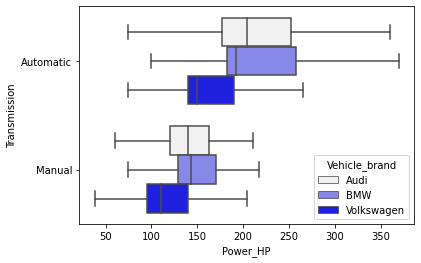

In [ ]:
# Checking the outliers again to ensure there are non
sns.boxplot(data=df, x="Power_HP", y="Transmission", hue="Vehicle_brand",color="blue",showfliers = False)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


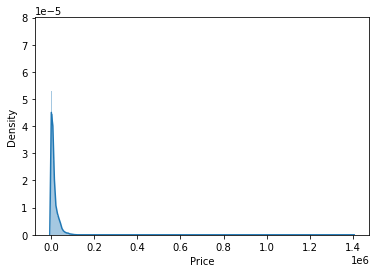

In [ ]:
# We can observe that the price ranges from 0^e6 to 1.4^e6 
sns.distplot(df['Price'], bins=500);

In [ ]:
# From both graphs we can say that there is definitely outliers specifically the 1.4^e6 
# In order to decide what we will do I will explore the data further to understand it more --> we can observe that there is definitely sth no right as the number on the top is very high comparing to the second one 
df['Price'].sort_values(ascending=False).head()


32304    1399800.0
31043     127980.0
14581     116168.0
30699     115580.0
30702     115580.0
Name: Price, dtype: float64

In [ ]:
# Going to drop index 32304 as it is definelty an outlier
df.drop(32304, inplace=True)

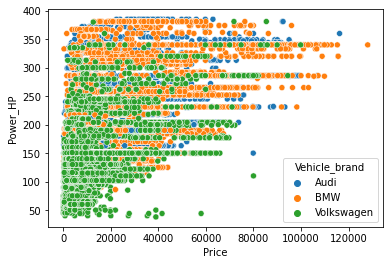

In [ ]:
sns.scatterplot(data=df, y="Power_HP", x="Price", hue="Vehicle_brand") #, style="Transmission")

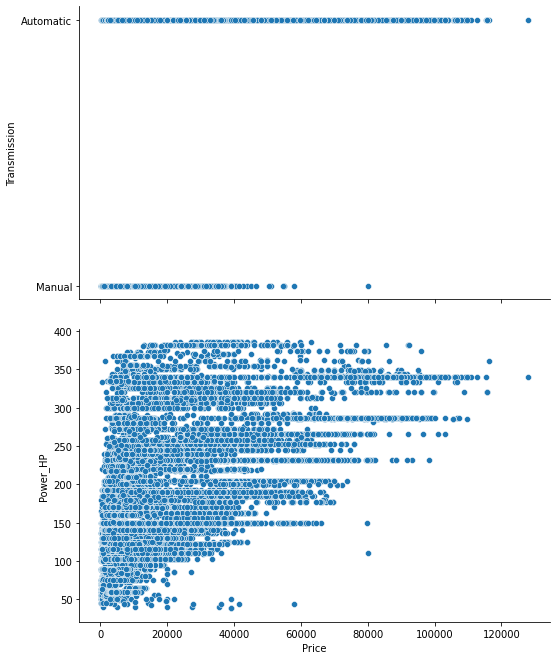

In [ ]:
g = sns.PairGrid(df,
                 x_vars='Price',
                 y_vars=[ 'Transmission', 'Power_HP',
                         ])
g.fig.set_size_inches(10, 10)
g.map(sns.scatterplot);

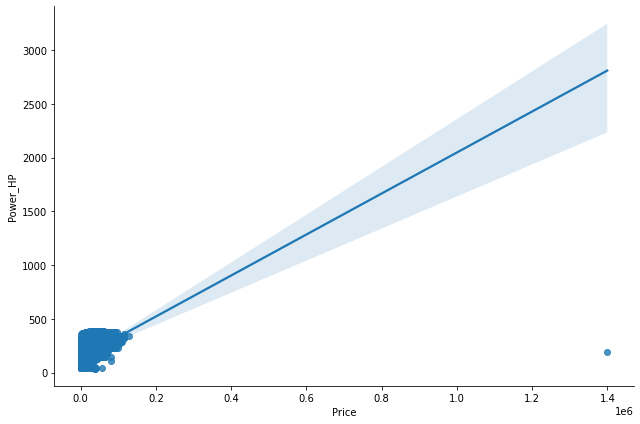

In [ ]:
# increase in price with the increase of horse power
sns.lmplot(data=df, x='Price', y='Power_HP', height=6, aspect=1.5);

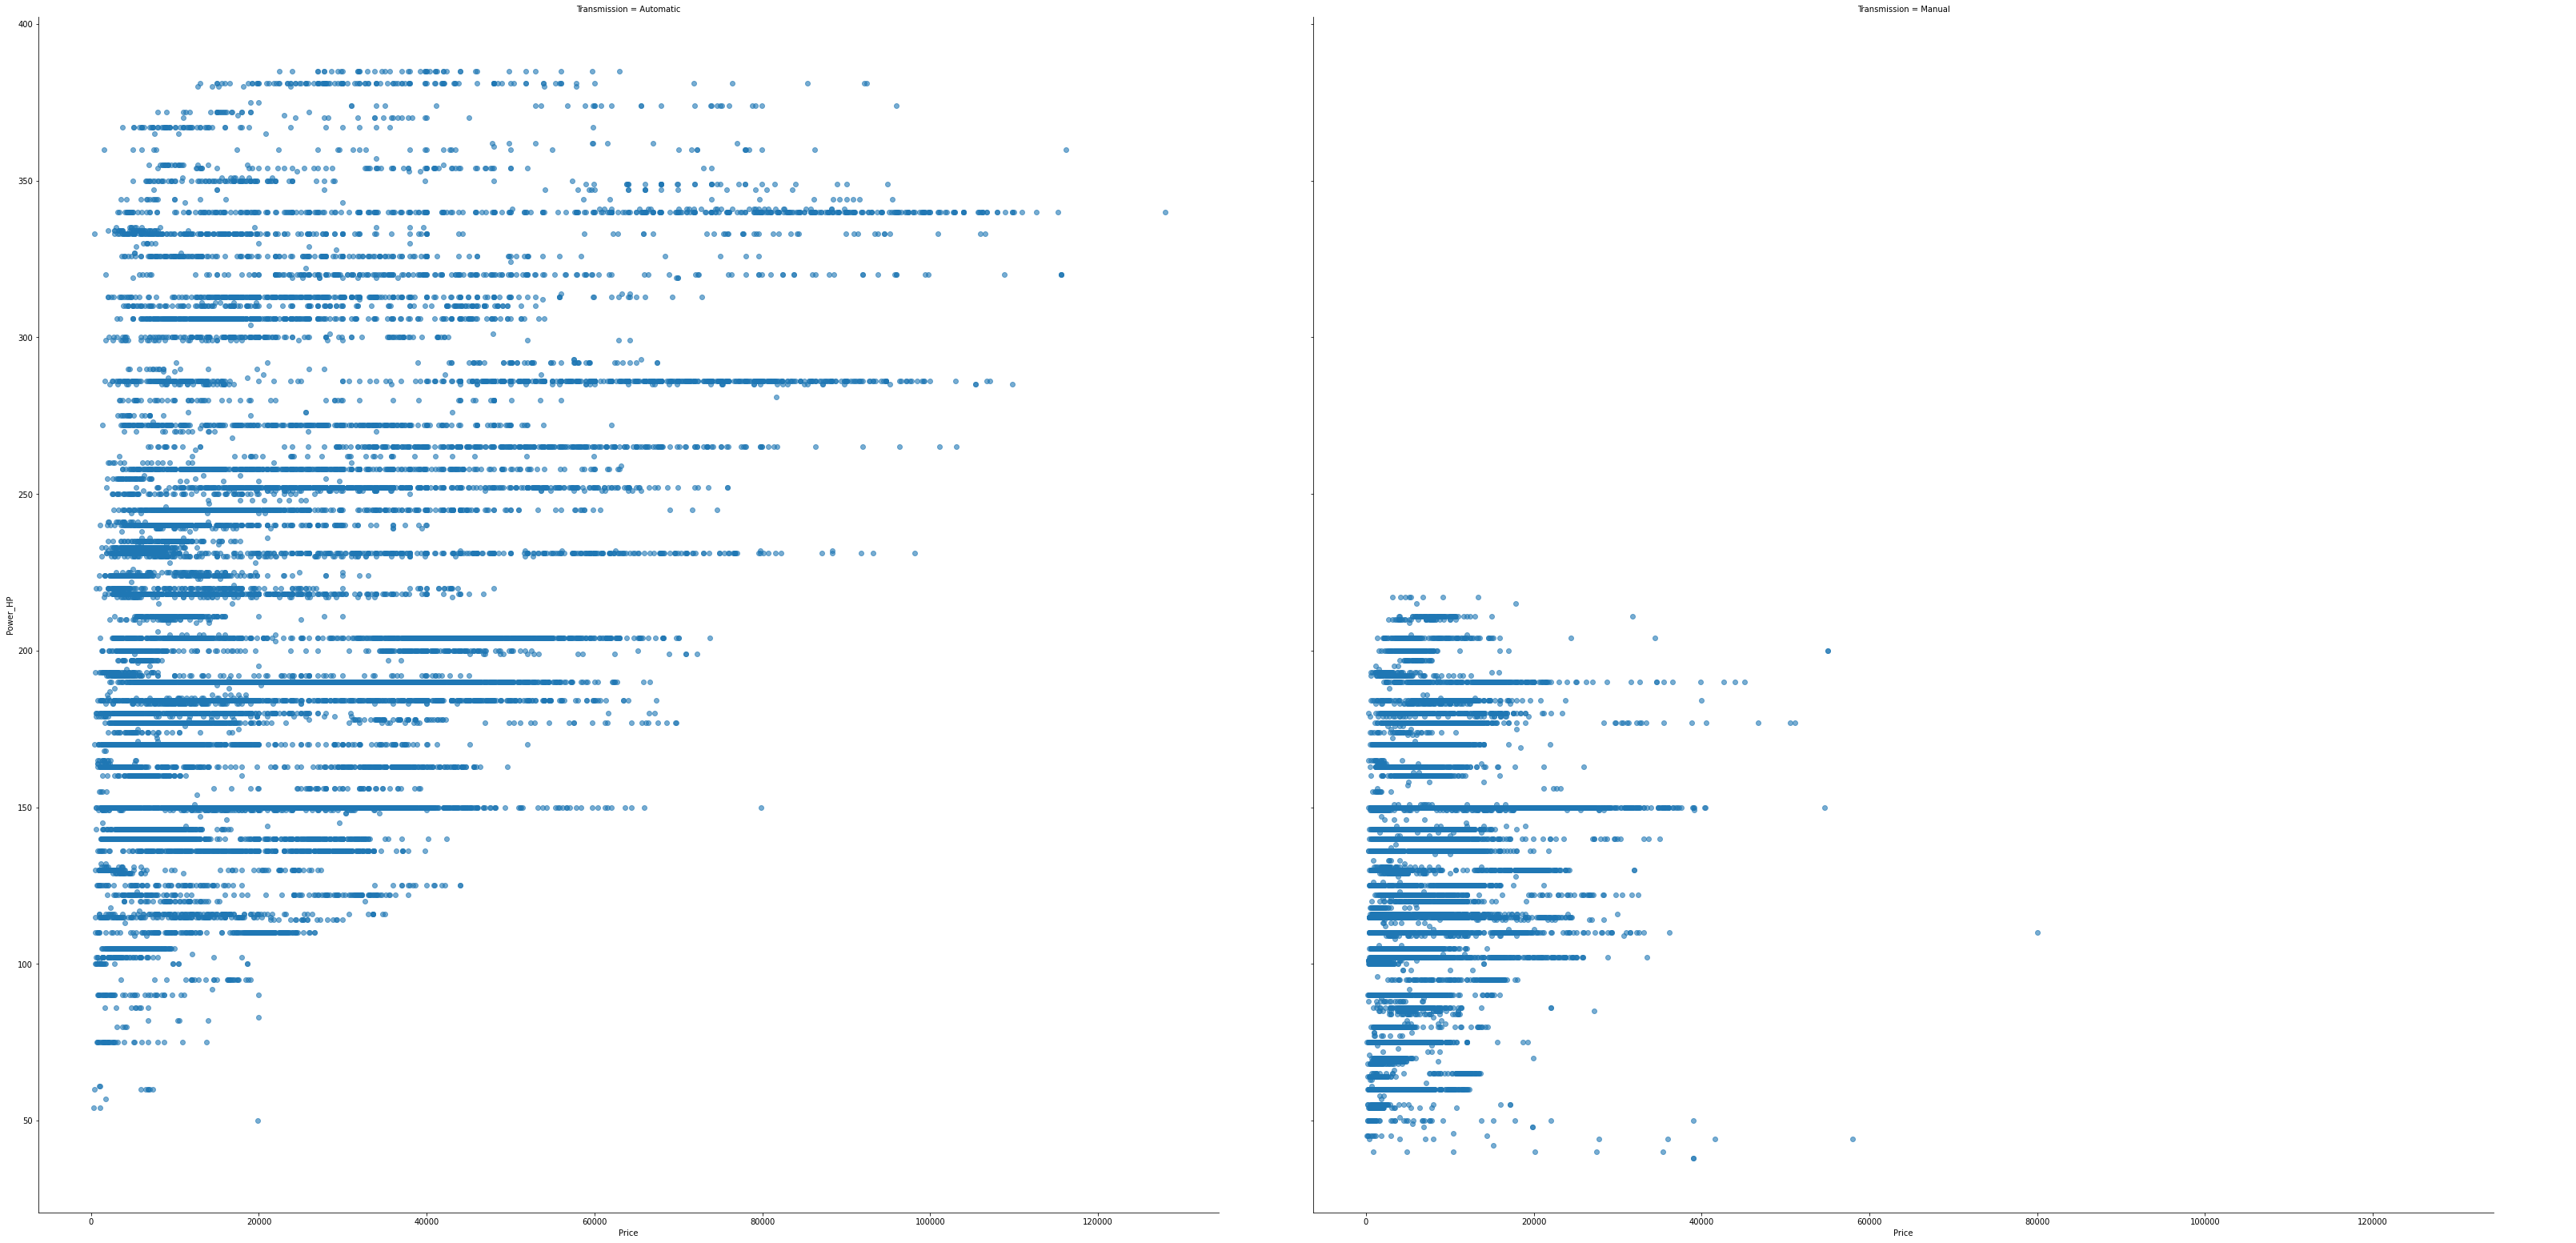

In [ ]:
# From the plot we can understand that as price increase power increase in both transmission 
g=sns.FacetGrid(df, col = "Transmission").map(plt.scatter, "Price", "Power_HP", alpha =0.6).add_legend()
g.fig.set_size_inches(50, 30)


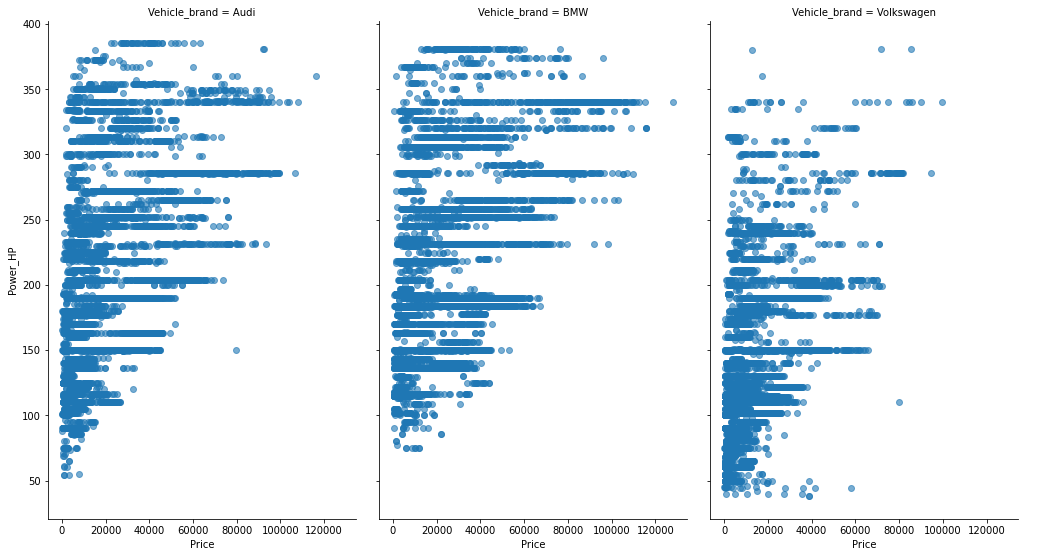

In [ ]:
g=sns.FacetGrid(df, col = "Vehicle_brand").map(plt.scatter, "Price", "Power_HP", alpha =0.6).add_legend()
g.fig.set_size_inches(15, 10)

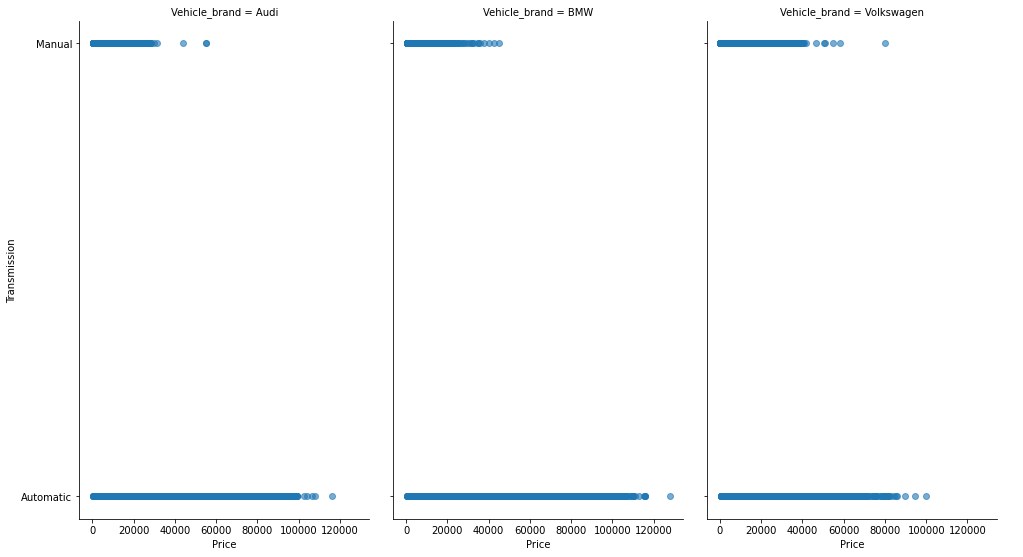

In [ ]:
g=sns.FacetGrid(df, col = "Vehicle_brand").map(plt.scatter, "Price", "Transmission", alpha =0.6).add_legend()
g.fig.set_size_inches(15, 10)

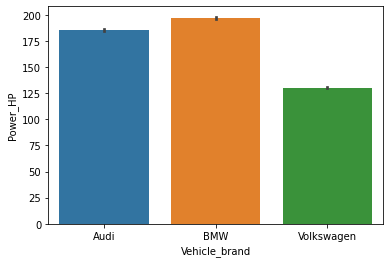

In [ ]:
sns.barplot(x=df['Vehicle_brand'], y=df['Power_HP'])

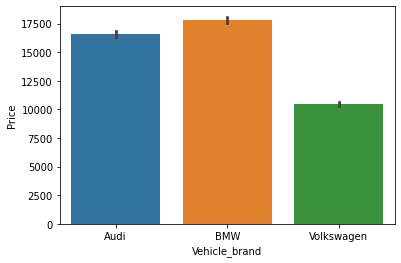

In [ ]:
sns.barplot(x=df['Vehicle_brand'], y=df['Price'])

**Insights:**
1) as power increase, price increase
2) Automatic cars are sold at higher price than Manual car
3) BMW are the most expensive cars to sell
4) BMW has the highest horsepower